<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Sudarshan Naicker
* **UCID** = 30162797
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete


X, y = load_concrete()
print('Size of X:', X.size)
print('Type of X:', type(X))
print('Size of y:', y.size)
print('Type of y:', type(y))

Size of X: 8240
Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: 1030
Type of y: <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import pandas as pd

models = {
    'DT': DecisionTreeRegressor(max_depth=5, random_state=0),
    'RF': RandomForestRegressor(max_depth=5, random_state=0),
    'GB': GradientBoostingRegressor(max_depth=5, random_state=0)
}

results = pd.DataFrame(index=['DT', 'RF', 'GB'], columns=['Training accuracy', 'Validation accuracy'])

for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    results.loc[name, 'Training accuracy'] = -cv_results['train_score'].mean()
    results.loc[name, 'Validation accuracy'] = -cv_results['test_score'].mean()

print(results)

   Training accuracy Validation accuracy
DT         47.918561          163.087775
RF         32.055432          156.404972
GB           3.73927           99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [4]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.
results2 = pd.DataFrame(index=['DT', 'RF', 'GB'], columns=['Training accuracy', 'Validation accuracy'])

for name, model in models.items():
    cv_results2 = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    results.loc[name, 'Training accuracy'] = cv_results2['train_score'].mean()
    results.loc[name, 'Validation accuracy'] = cv_results2['test_score'].mean()

print(results)

   Training accuracy Validation accuracy
DT          0.822887             0.17621
RF          0.881221            0.173748
GB          0.986436            0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1) Linear Model: has an MSE of 95.635 (higher the better) and a R2 score of 0.636 on the validation set.
   tree-models: none of the 3 models have a better R2 score as they are all much lower than 0.6. the higher NSME (close to 0) means there are fewer errors. most of the NSME values are far away from 0.

   Hence Linear model is performing better on the validation set than the other 3 models. 
 

2) Negative Mean Squared Error (NMSE): Lower NMSE values (closer to zero) are better since they indicate a smaller error. The Gradient     
   Booster model has the lowest NMSE for validation accuracy compared to the Decision Tree and Random Forest models, which means that it is making fewer mistakes on the validation set.

   R² Score: Higher R² values (closer to 1) indicate a better fit. The Gradient Booster has the highest R² score for the validation accuracy, hence it is able to capture the data points better than  the other 2 models.

3) - We could increase the number of features in the dataset this would give the model more chances to learn and correct its mistakes.
   - We could change the Parameters like having more depth of trees or more number of trees.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

1) I had to review through the Lab_4_Decission_trees_and_svc.ipynb file to understand about  decision trees and random forest models.
2) I completed them from step 1 to 5
3) yes, I used AI to help me with creating the for loop, inorder to put all the models in one list and use for loop to calculate their scores rather than training each model one by one. Using AI helped me to understand an easier, more readable and shorter way to write python codes.
4) No this part was very straightforward. easy to understand the question and go with the flow.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

print(f'Feature matrix X has size: {X.size} and types: \n{type(X)}')
print(f'\nTarget vector y has size: {y.size} and type: \n{type(y)}')



Feature matrix X has size: 2314 and types: 
<class 'pandas.core.frame.DataFrame'>

Target vector y has size: 178 and type: 
<class 'pandas.core.frame.DataFrame'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
df = pd.DataFrame(X, columns=wine.data.feature_names)
df['Target'] = y  # Add target column

# Display the DataFrame
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE

missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
print("Missing values in X:\n", missing_values_X)
print("\nMissing values in y: ", missing_values_y)

Missing values in X:
 Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

Missing values in y:  class    0
dtype: int64


How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE
sample_counts = df['Target'].value_counts()
print(sample_counts)

Target
2    71
1    59
3    48
Name: count, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

y = y.values.ravel() # to change the shape of y to (n_samples, )

models = {
    'SVC': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=0)
}

results_df = pd.DataFrame(index=['SVC', 'Decision Tree'], columns=['Training accuracy', 'Validation accuracy'])

# Perform cross-validation for each model
for name, model in models.items():
    cv_results3 = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)

    results_df.loc[name, 'Training accuracy'] = cv_results3['train_score'].mean()
    results_df.loc[name, 'Validation accuracy'] = cv_results3['test_score'].mean()

print(results_df)

              Training accuracy Validation accuracy
SVC                    0.703743            0.663492
Decision Tree          0.974756            0.893175


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [10]:
# TO DO: Implement best model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

best_model = DecisionTreeClassifier(max_depth=3, random_state=0)


best_model.fit(X, y)
y_pred = best_model.predict(X)
confusion = confusion_matrix(y, y_pred)

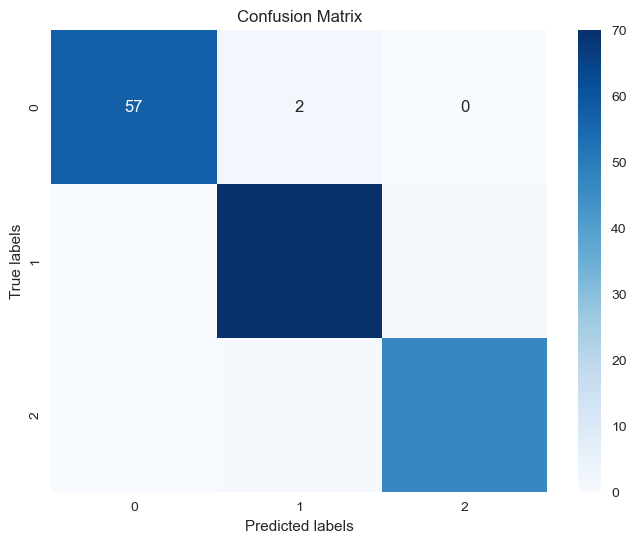

In [11]:
# TO DO: Print confusion matrix using a heatmap


plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [12]:
# TO DO: Print classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1) As seen in the result SVC has 0.70 % Accuracy for Training set and 0.66 % Accuracy for validation set which is lower compared to the Decision tree model which has 0.97% and 0.89% Accuracy for training and validation set respectively. hence the accuracy scores improved by changing the model from SVC to Descission tree.

2)  The SVC might not be well-tuned for the dataset. since they have multiple hyperparameters like C, kernel, and gamma that can affect the performance

3) for class 1 with 59 samples 57 are correctly labeled and the remaining <b>2</b> are labelled as class 2.

4) Precision means having all wines classified correctly. Recall means having a certain category of wines to be classified correctly. Here recall score maters more because we would typically wants expensive wines to NOT be misclassified.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

1) I had to review through the Lab_4_Decission_trees_and_svc.ipynb file to understand about  decision trees and random forest models.
2) I completed them from step 1 to 5
3) yes, I used AI to help me the confusion matrix as the question was confusing and it helped me to understand how to calculate the classification report.
4) Yes, i had problems with the confusion matrix as i was not able to find similar examples in the labs so i took help of chatgpt to leanr how to solve the confusion matrix.

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

Part 1: I found that Gradient booster has performed better in both NMSE and R2 score than the decision tree or Random forest models.
<br>
Part 2: 
- As seen in the classification report class 1 had highest precision of 1 this means that every time it predicted class 1, it was       
  correct (no false positives). The recall is 0.97, which means it correctly identified 97% of all actual class 1 instances (there were some false negatives).
        
- For class 3, both precision and recall are 0.98, which means it has a balanced performance in terms of both false positives and    
  false negatives for class 3.

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>


- I liked Part 1 it was much easier to understand the questions were straightforward.
- Part 2 was challenging. first obstacle was importing the model, there were different ways to import it from https://archive.ics.uci.edu/dataset/109/wine. like downloading the csv file etc. after reading through the document i found that we can perform pip install ucimlrepo ad then import the dataset to our local system which was much easier and simpler. Then the confusion matrix was confusing as the question just asked print the confusion matrix, I tried searching the labs but couldnt find any examples, Hence I aksed my classmates and AI to learn how to work on this and came with a solution to split the dataset, train the model and and calculate the confusion matrix. 

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [13]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*